In [136]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
from scipy import stats 
import numpy as np
plt.style.use('seaborn-whitegrid')

# Loading the data set, convert to DataFrame

In [137]:
iris = load_iris()

df = pd.DataFrame(data=iris.data,index=iris.target,columns=iris.feature_names)
df['species'] = iris.target
df.index = range(df.count(axis='rows')[0])

df.loc[df['species'] == 0, 'species'] = 'setosa'
df.loc[df['species'] == 1, 'species'] = 'virginica'
df.loc[df['species'] == 2, 'species'] = 'versicolor'

df.rename(columns = (lambda column: column.title()))

,Sepal Length (Cm),Sepal Width (Cm),Petal Length (Cm),Petal Width (Cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,versicolor
146,6.3,2.5,5.0,1.9,versicolor
147,6.5,3.0,5.2,2.0,versicolor
148,6.2,3.4,5.4,2.3,versicolor


# Data Exploration

In [138]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


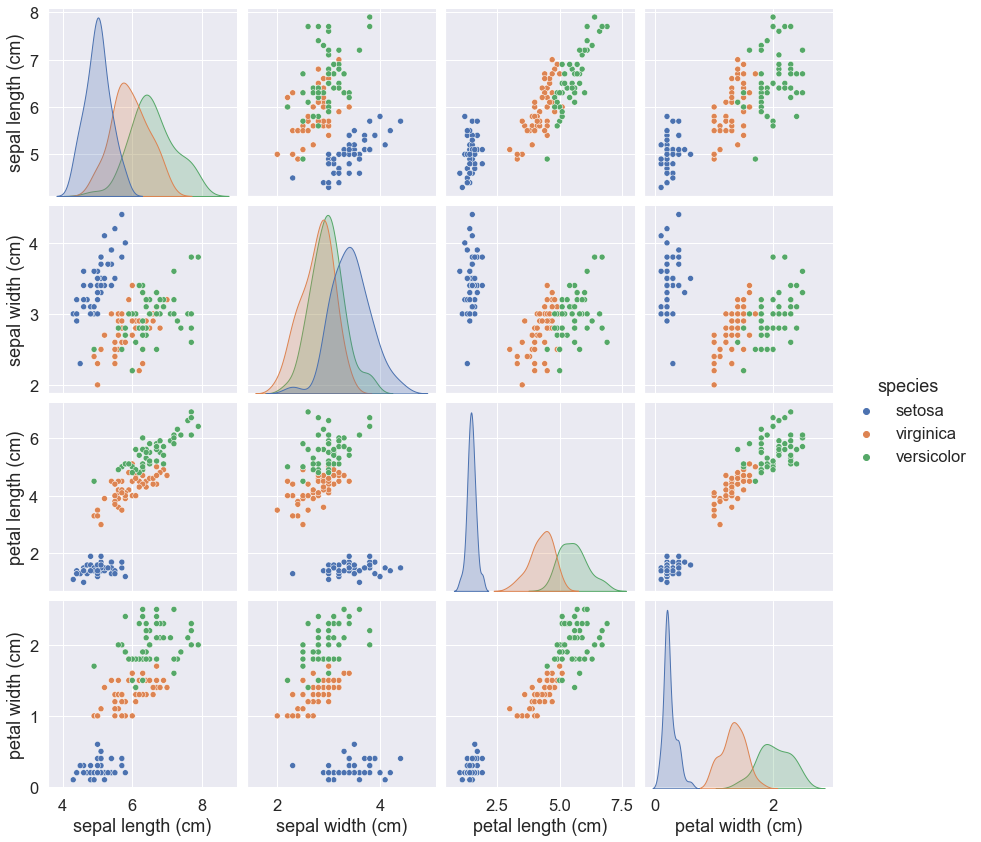

In [139]:
#Plotting the correletions between the parameters and species
sbn.set_style("whitegrid")
sbn.set(font_scale = 1.5)
sbn.pairplot(df,hue="species",height=3)
plt.show()

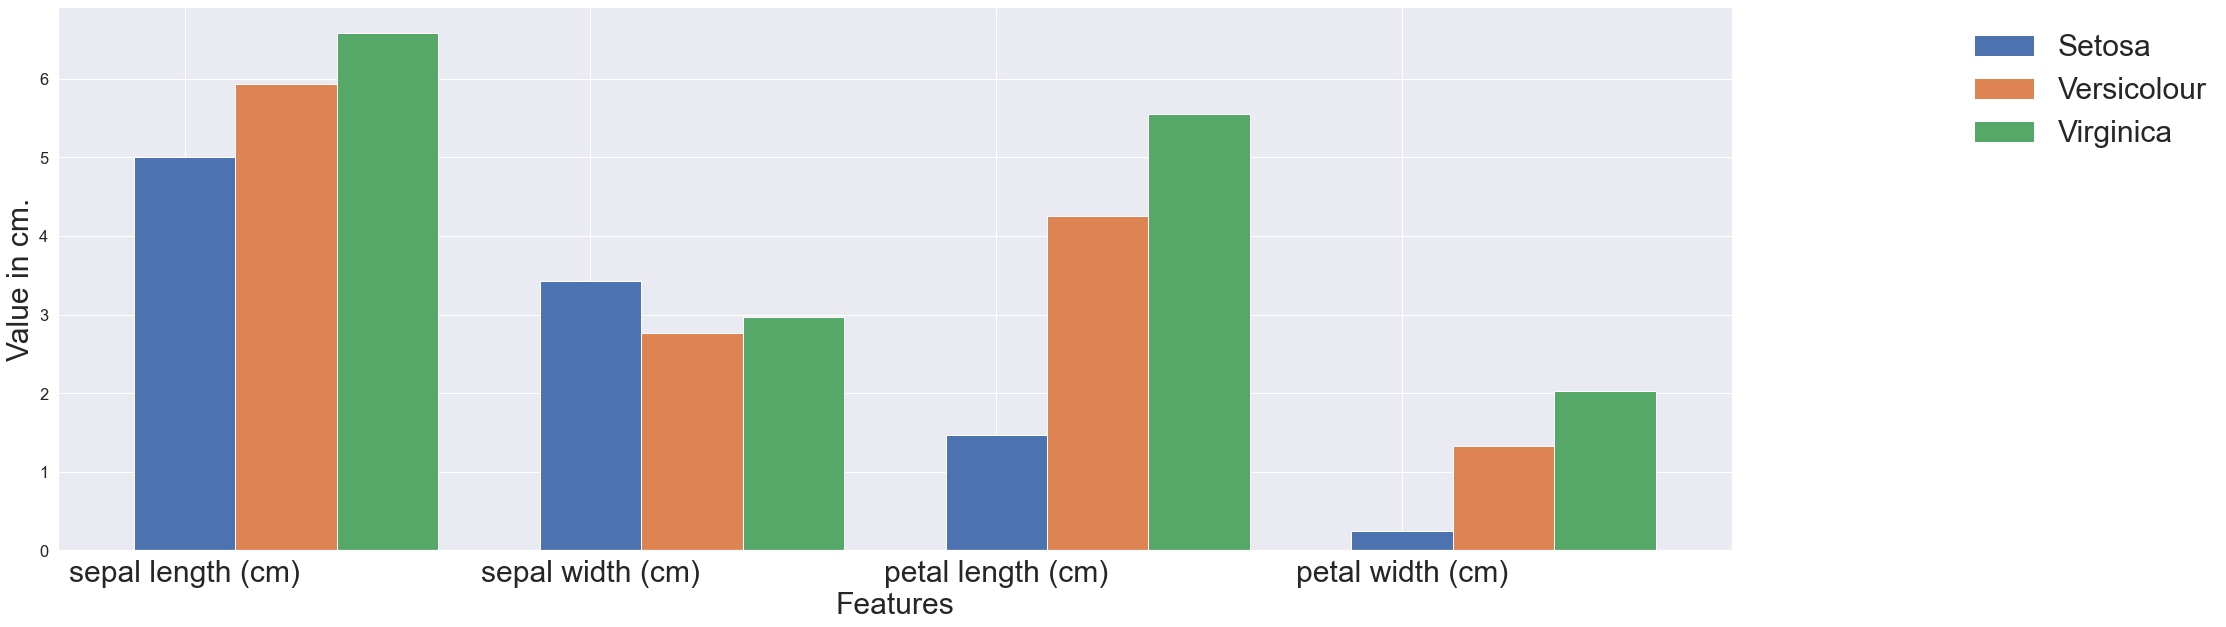

In [140]:
#Plotting the average of each parameter for each Iris flower type
avg_arr = []

for j in range(3):
    for i in range(4):
        avg = df.loc[df["species"] == df['species'].unique()[j], df.columns[i]].mean()
        avg_arr.append(avg)

X_axis = np.arange(len(df.columns[0:5])-1)

# Plot the average
plt.figure(figsize=(30,10))
plt.bar(X_axis, avg_arr[:4], 0.25, label = 'Setosa')
plt.bar(X_axis + 0.25, avg_arr[4:8], 0.25, label = 'Versicolour')
plt.bar(X_axis + 0.5, avg_arr[8:], 0.25, label = 'Virginica')
plt.xticks(X_axis, df.columns[:4], fontsize=30)
plt.xlabel("Features", fontsize=30)
plt.ylabel("Value in cm.", fontsize=30)
plt.legend(bbox_to_anchor=(1.3,1), fontsize=30)
plt.show()

# SVM algorithm

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df.iloc[:,0:4]
Y = df.iloc[:,4]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
svn = SVC()
svn.fit(X_train, y_train)

# Predict from the test dataset
predictions = svn.predict(X_test)

# Calculate the accuracy
accuracy_score(y_test, predictions)

0.9333333333333333

In [166]:
#new flower to be classified
X_new = np.array([[ 5, 2.5, 3.9, 3.2 ]])

#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['versicolor']


# K-Means algorithm

In [167]:
from sklearn.cluster import KMeans

#Choose by which parameter to calculate the K-Means (petal / sepal)
x_column = "petal length (cm)"
y_column = "petal width (cm)"

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(df[[x_column,y_column]])

y_kmeans = kmeans.fit_predict(df[[x_column,y_column]])

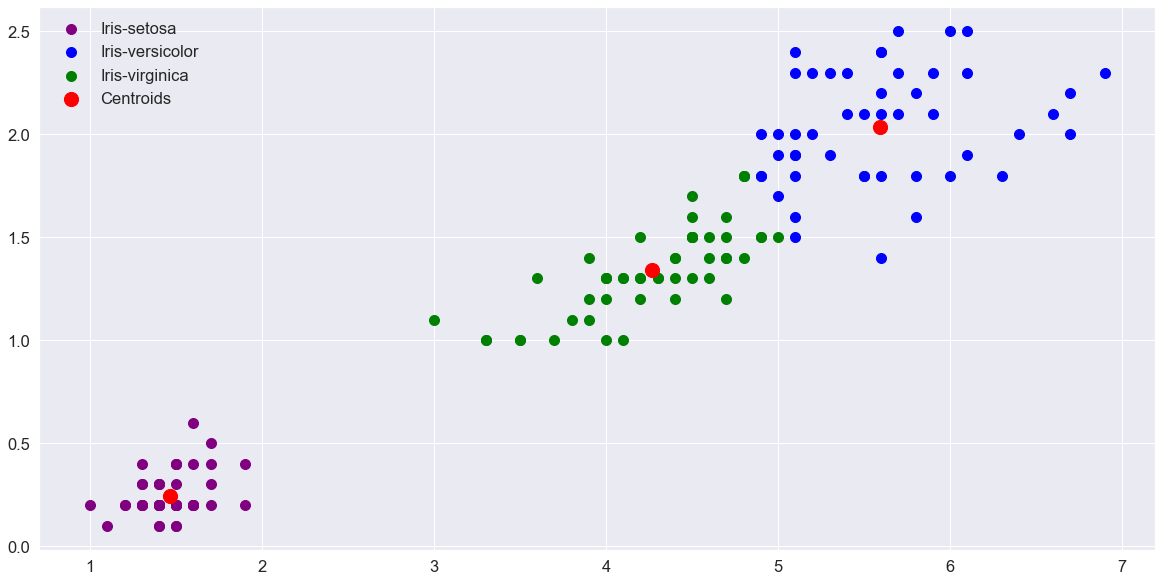

In [168]:
plt.figure(figsize = (20,10))

#Plotting the data points
plt.scatter(df[x_column][y_kmeans == 0], df[y_column][y_kmeans == 0], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(df[x_column][y_kmeans == 1], df[y_column][y_kmeans == 1], s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(df[x_column][y_kmeans == 2], df[y_column][y_kmeans == 2], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, c = 'red', label = 'Centroids')
plt.legend()